## <a id='toc1_'></a>Project 2 | Machine Learning - Customer Loyalty & Churn Risk Modeling [&#8593;](#toc0_)

Understanding why customers leave is a critical component of effective growth and retention strategy. This project develops a machine learning–based churn risk model for a telecommunications company with the goal of supporting more informed marketing and customer communication decisions. Rather than replacing human judgment, the model is designed as a decision-support tool that categorizes customers into churn risk levels and highlights key factors associated with attrition.

The analysis combines exploratory data analysis, a reproducible modeling pipeline with hyperparameter tuning, and rigorous evaluation to balance predictive performance with interpretability. The final model is used to segment customers into meaningful risk groups and translate predictive insights into actionable business recommendations, providing strategic guidance rather than direct automation.

## <a id='toc1_'></a>Problem Statement and Objectives[&#8593;](#toc0_)

Customer churn represents a significant challenge for telecommunications companies, as losing customers directly impacts revenue and increases acquisition costs. The objective of this project is to develop a machine learning model that can predict whether a customer is likely to churn based on demographic, service usage, and billing information.

Rather than deploying the model as an automated decision system, the goal is to use its predictions to better understand patterns of customer attrition and to segment customers into churn risk categories. These risk segments can then be used by business stakeholders to inform targeted marketing, retention strategies, and customer communication efforts.

## <a id='toc1_'></a>Data Preperation and Cleaning [&#8593;](#toc0_)

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,Unnamed: 0,Customer ID,Gender,Age,Senior Citizen,Married,Dependents,Tenure in Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Churn
0,0,8779-QRDMV,Male,78,Yes,No,No,1,No,No,Yes,No,No,Yes,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,Yes
1,1,7495-OOKFY,Female,74,Yes,Yes,Yes,8,Yes,Yes,Yes,No,Yes,No,No,No,No,Month-to-Month,Yes,Credit Card,80.65,633.30,Yes
2,2,1658-BYGOY,Male,71,Yes,No,Yes,18,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,Yes
3,3,4598-XLKNJ,Female,78,Yes,Yes,Yes,25,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,Yes
4,4,4846-WHAFZ,Female,80,Yes,Yes,Yes,37,Yes,Yes,Yes,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,Yes


In [49]:
df_clean = df.copy()

In [50]:
#Dropping these columns because they are not helpful for modeling or EDA
df_clean = df_clean.drop(columns=['Customer ID', 'Unnamed: 0'], errors='ignore')

In [51]:
#Standaridizing target variables
df_clean['Churn'] = df_clean['Churn'].map({'Yes': 1, 'No': 0})

In [52]:
df_clean.head()

,Gender,Age,Senior Citizen,Married,Dependents,Tenure in Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Churn
0,Male,78,Yes,No,No,1,No,No,Yes,No,No,Yes,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,1
1,Female,74,Yes,Yes,Yes,8,Yes,Yes,Yes,No,Yes,No,No,No,No,Month-to-Month,Yes,Credit Card,80.65,633.30,1
2,Male,71,Yes,No,Yes,18,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,1
3,Female,78,Yes,Yes,Yes,25,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,1
4,Female,80,Yes,Yes,Yes,37,Yes,Yes,Yes,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,1


In [53]:
#Confirming no hidden missing values
df_clean.isnull().sum()

Gender                    0
Age                       0
Senior Citizen            0
Married                   0
Dependents                0
Tenure in Months          0
Phone Service             0
Multiple Lines            0
Internet Service          0
Online Security           0
Online Backup             0
Device Protection Plan    0
Premium Tech Support      0
Streaming TV              0
Streaming Movies          0
Contract                  0
Paperless Billing         0
Payment Method            0
Monthly Charge            0
Total Charges             0
Churn                     0
dtype: int64

In [54]:
#Checking class inbalance I'll reference later
df_clean['Churn'].value_counts(normalize=True)

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

## <a id='toc1_'></a>Exploratory Data Analysis (EDA)[&#8593;](#toc0_)

The dataset contains a mix of numerical and categorical features. Numerical variables such as age, tenure, and billing amounts are stored using numeric data types, while categorical variables are represented as object types. No manual type conversions were applied at this stage, as categorical features will be handled using one-hot encoding within the modeling pipeline. This approach ensures consistent preprocessing and prevents data leakage.

In [55]:
df_clean.shape

(7043, 21)

In [56]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  7043 non-null   object 
 1   Age                     7043 non-null   int64  
 2   Senior Citizen          7043 non-null   object 
 3   Married                 7043 non-null   object 
 4   Dependents              7043 non-null   object 
 5   Tenure in Months        7043 non-null   int64  
 6   Phone Service           7043 non-null   object 
 7   Multiple Lines          7043 non-null   object 
 8   Internet Service        7043 non-null   object 
 9   Online Security         7043 non-null   object 
 10  Online Backup           7043 non-null   object 
 11  Device Protection Plan  7043 non-null   object 
 12  Premium Tech Support    7043 non-null   object 
 13  Streaming TV            7043 non-null   object 
 14  Streaming Movies        7043 non-null   

In [57]:
df_clean.describe()

,Age,Tenure in Months,Monthly Charge,Total Charges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,32.386767,64.761692,2280.381264,0.265370
std,16.750352,24.542061,30.090047,2266.220462,0.441561
min,19.000000,1.000000,18.250000,18.800000,0.000000
25%,32.000000,9.000000,35.500000,400.150000,0.000000
50%,46.000000,29.000000,70.350000,1394.550000,0.000000
75%,60.000000,55.000000,89.850000,3786.600000,1.000000
max,80.000000,72.000000,118.750000,8684.800000,1.000000


In [58]:
df_clean['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [59]:
df_clean['Churn'].value_counts(normalize=True)

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

Understanding the distribution of the target variable is critical, as class imbalance can influence both model training and evaluation. This analysis helps justify the choice of evaluation metrics used later in the project.

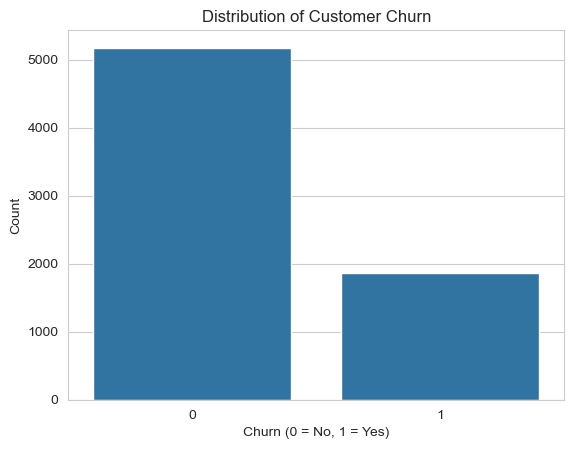

In [60]:
sns.countplot(data=df_clean, x='Churn')
plt.title("Distribution of Customer Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

- Approximately 26–27% of customers churned
- Dataset is imbalanced but not severely
- We cannot rely on accuracy alone here because it treats all errors equally and thats fine only if the classes are balance, which are not
- Churn prediction is asymetric in that there will be false Positives and false negatives
- F1 score is appropriate because finding at-risk customers matters more than inflating overall correctness. F1 score balances precision and recall.
- ROC analysis is also needed because ROC lets me visualize recalls vs false positive rate, and enables sensitivity tuning for business tradeoffs.

Due to class imbalance in the target variable, accuracy alone is insufficient to evaluate model performance, as it may obscure poor detection of churned customers. Therefore, F1 score and ROC-based analysis are emphasized.

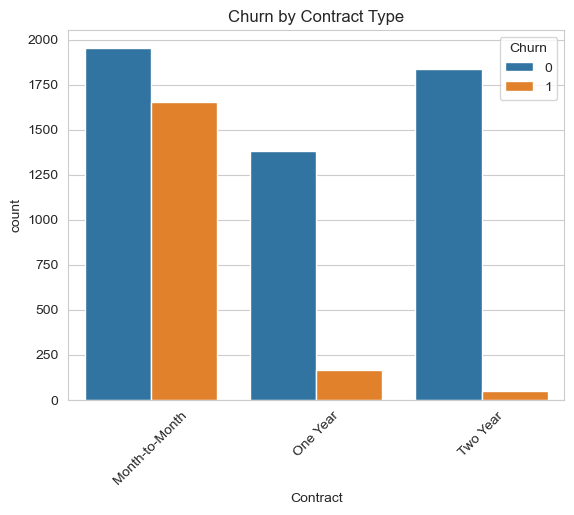

In [61]:
sns.countplot(data=df_clean, x='Contract', hue='Churn')
plt.title("Churn by Contract Type")
plt.xticks(rotation=45)
plt.show()

- Month-to-month contracts show substantially higher churn
- Longer contracts are associated with stronger retention
- Contract type is likely a high importance feature

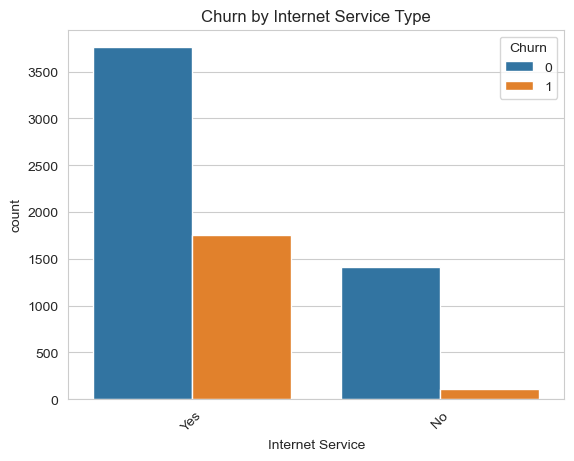

In [62]:
sns.countplot(data=df_clean, x='Internet Service', hue='Churn')
plt.title("Churn by Internet Service Type")
plt.xticks(rotation=45)
plt.show()

- Differences in churn across service types suggest service experience influences attrition
- Indicates potential for targeted service improvements

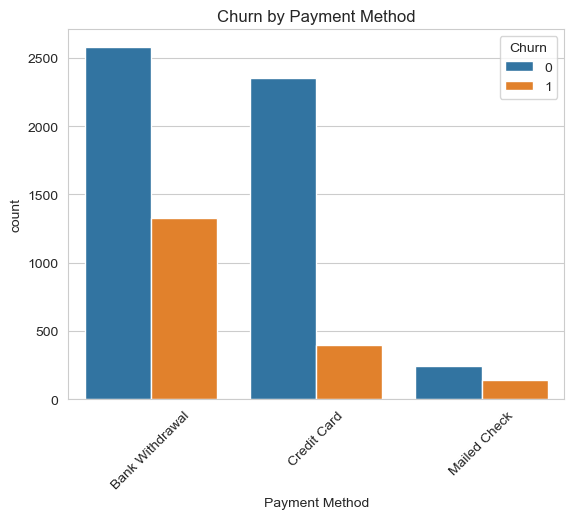

In [63]:
sns.countplot(data=df_clean, x='Payment Method', hue='Churn')
plt.title("Churn by Payment Method")
plt.xticks(rotation=45)
plt.show()

- Certain payment methods are associated with higher churn
- Suggests billing friction may contribute to customer dissatisfaction

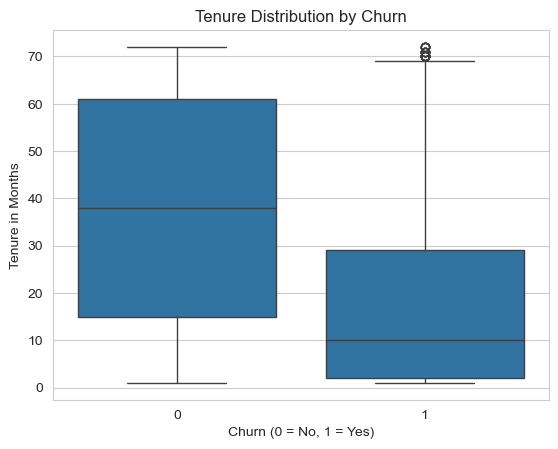

In [64]:
sns.boxplot(data=df_clean, x='Churn', y='Tenure in Months')
plt.title("Tenure Distribution by Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.show()

- Churned customers tend to have shorter tenure
- Early customer lifecycle is a critical risk period

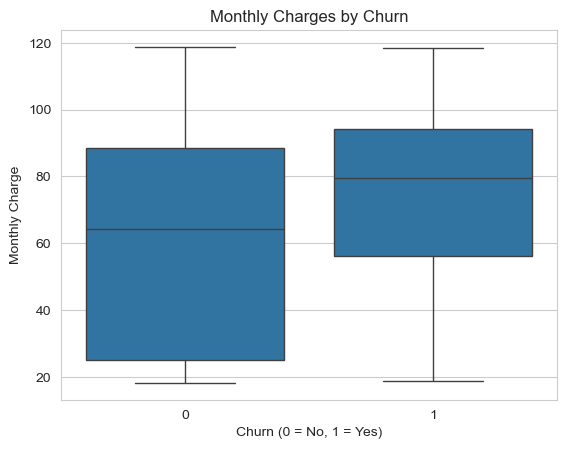

In [65]:
sns.boxplot(data=df_clean, x='Churn', y='Monthly Charge')
plt.title("Monthly Charges by Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.show()

- Higher monthly charges correlate with higher churn
- Indicates price sensitivity among certain customer segments

Key EDA Insights

- Customer churn is present in approximately one quarter of the dataset, indicating a moderate class imbalance that should be accounted for during model evaluation
- Contract type is strongly associated with churn, with month-to-month customers exhibiting significantly higher attrition rates
- Shorter tenure customers are at greater risk of churn, suggesting that early engagement and onboarding are critical retention levers
- Higher monthly charges and certain billing methods are associated with increased churn, highlighting potential opportunities for pricing and billing strategy optimization

## <a id='toc1_'></a>Modeling Pipeline & Feature Preprocessing[&#8593;](#toc0_)

In [66]:
#Now we beging the train test split.
from sklearn.model_selection import train_test_split

#Here im defining the feature variable
#and defining the target variable
X = df_clean.drop(columns='Churn')
y = df_clean['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape

((5282, 20), (1761, 20))

To explain the train set shape;
- 5,282 is the number of customers used for training
- 20 is the input of features per customer
- 21-1= features. 1 = Churn
- This confirms my feature target seperation
The test set;
- 1,761 is the customers held out for evaluation
- 20 is the columns for the same features as training set
- This confirms no rows were lost
- Split proportion is correct of 75/25

Overall, The dataset was split into training and testing sets using a 75/25 split with stratification on the churn variable, resulting in 5,282 training observations and 1,761 testing observations, each with 20 input features.

In [67]:
#Now to identify numeric and categorical features.
#The different data types require different preprocessing. Numeric for scaling and categorical for encoding.

numeric_features = [
    'Age',
    'Tenure in Months',
    'Monthly Charge',
    'Total Charges'
]

categorical_features = [
    col for col in X_train.columns if col not in numeric_features
]

numeric_features, categorical_features

(['Age', 'Tenure in Months', 'Monthly Charge', 'Total Charges'],
 ['Gender',
  'Senior Citizen',
  'Married',
  'Dependents',
  'Phone Service',
  'Multiple Lines',
  'Internet Service',
  'Online Security',
  'Online Backup',
  'Device Protection Plan',
  'Premium Tech Support',
  'Streaming TV',
  'Streaming Movies',
  'Contract',
  'Paperless Billing',
  'Payment Method'])

In [68]:
#this is for the numeric preprocessing pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

#Median input for safety against missing values and standarscaler to help linear models and optimization.

In [100]:
#this is for the categorical preprocessing pipeline
from sklearn.preprocessing import OneHotEncoder

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
#most frequent input to handle rare missing categories, onehotecoder to conver categories to numeric format
#handle unknown=ignore to prevent crashe on unseen categories

In [70]:
#column transformer 
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

The dataset was split into training and testing sets using a 75/25 split with stratification on the churn variable, resulting in 5,282 training observations and 1,761 testing observations, each with 20 input features.

In [72]:
#this code is the baseling modeling pipeline (Logistic Regression)
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    class_weight='balanced',
    random_state=42,
    max_iter=1000
)

In [73]:
#this code is for the full pipeline (Preprocessing + Model)
from sklearn.pipeline import Pipeline

log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', log_reg)
])

In [74]:
#Now fitting the baseline model
log_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Tenure in Months',
                                                   'Monthly Charge',
                                                   'Total Charges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Senior Citizen',
                                                   'Married', 'Dependents',
                                                   'Phone Service',
                                                   'Multiple Lines',
                                                   'Internet Service',
                                                   'Online Security',
                                                   'Online Backup',
                                                   'Device Protection Plan',
                                                   'Premium Tech Support',
                                                   'Streaming TV',
                                                   'Streaming Movies',
                                                   'Contract',
                                                   'Paperless Billing',
                                                   'Payment Method'])])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [75]:
#Baseline evaluation
from sklearn.metrics import f1_score

y_train_pred = log_reg_pipeline.predict(X_train)
y_test_pred = log_reg_pipeline.predict(X_test)

print("Train F1:", f1_score(y_train, y_train_pred))
print("Test F1:", f1_score(y_test, y_test_pred))

Train F1: 0.6611851431811738
Test F1: 0.6666666666666666


## <a id='toc1_'></a>Model Training & Hyperparameter Tuning[&#8593;](#toc0_)

In [76]:
#Now setting up RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_distributions = {
    'model__C': np.logspace(-3, 3, 25),          #regularization strength
    'model__penalty': ['l2'],                    #keep simple and stable
    'model__solver': ['lbfgs', 'saga'],          #both support l2
    'model__class_weight': [None, 'balanced']    #handle imbalance
}

random_search = RandomizedSearchCV(
    estimator=log_reg_pipeline,
    param_distributions=param_distributions,
    n_iter=20,                 #This is for the number of random combinations to try
    scoring='f1',              
    cv=5,                      
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

random_search.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'model__solver': 'saga',
 'model__penalty': 'l2',
 'model__class_weight': None,
 'model__C': np.float64(0.5623413251903491)}

The randomized hyperparameter search evaluated multiple configurations of the logistic regression pipeline using 5-fold cross-validation and F1 score as the optimization metric. The best-performing configuration used L2 regularization with the saga solver and a regularization strength (C) of approximately 0.56. This result indicates that moderate regularization provides the best balance between precision and recall for predicting customer churn in this dataset.

## <a id='toc1_'></a>Model Evaluation[&#8593;](#toc0_)

In [97]:
#now to ealuate the best model from random search
from sklearn.metrics import f1_score, classification_report, confusion_matrix

best_model = random_search.best_estimator_

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

print("Best CV F1:", random_search.best_score_)
print("Train F1:", f1_score(y_train, y_train_pred))
print("Test F1:", f1_score(y_test, y_test_pred))

print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))

Best CV F1: 0.6695516733840228
Train F1: 0.6684092606422704
Test F1: 0.6704161979752531

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1294
           1       0.71      0.64      0.67       467

    accuracy                           0.83      1761
   macro avg       0.79      0.77      0.78      1761
weighted avg       0.83      0.83      0.83      1761


Confusion Matrix (Test):
[[1170  124]
 [ 169  298]]


The F1 resulst show no sign of overfitting due to being almost identical (.669 | .668 | .670) and that cross validation performance generalizes well to unseen data.

The classification report for class 0 (no churn) had a prescision score of .87 and a recall score of .90. This means that when the moderl predicts no churn, is it usually correct and successfully retains most non-churning customers.

Class 1 (with churn) scored .71 on prescision, .64 for recall. and .67 from F1. Meaning the model predicts churn right 71% of the time and captures 64% of actual churners. This can be increased later if the business wants more sensitivity.

The accuracy of 83% is high and we shouldnt trust it alone because a model biased against no churn will inflate accuracy. From earlier, 73% of customers dont churn (from cell 59 class imbalance).

For the confusion matrix; 
- 1170 correctly predicted non-churners
- 298 correctly predicted churners
- 124 false positives which are customers the model flagged but did not leave
- 169 false negatives which are churners the model missed

The tuned logistic regression model achieved an F1 score of approximately 0.67 on both cross validation and the held out test set, indicating stable generalization and minimal overfitting. The classification report shows strong performance in identifying nonchurning customers while capturing a meaningful proportion of churned customers. Although some churn cases are missed, the model provides a balanced tradeoff between precision and recall, making it suitable as a decision support tool for customer retention efforts rather than a fully automated system.

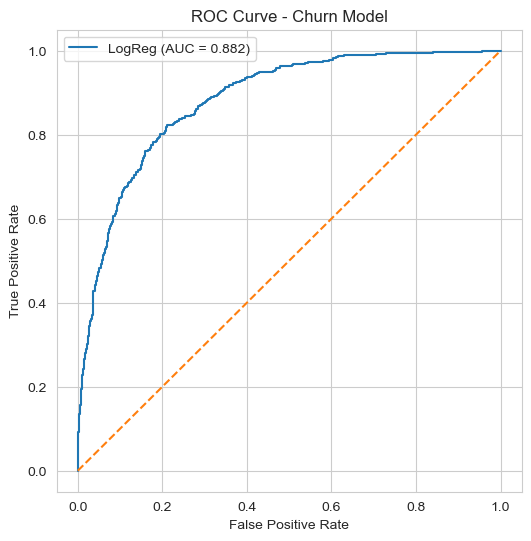

In [83]:
#Plotting the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_test_proba = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
auc = roc_auc_score(y_test, y_test_proba)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"LogReg (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Churn Model")
plt.legend()
plt.show()

The ROC curve illustrates the tradeoff between the true positive rate and false positive rate across all possible decision thresholds. The model achieves an AUC of 0.882, indicating strong ability to distinguish between customers who churn and those who do not. This performance suggests that the model effectively ranks customers by churn risk, making it well suited for risk- ased segmentation and threshold tuning. Rather than relying on a fixed classification threshold, the ROC curve supports informed decision making around sensitivity depending on business priorities.

The ROC curve confirms that the model reliably ranks customers by churn risk, enabling flexible threshold selection and meaningful churn risk segmentation.

In [98]:
#Saving the model as .pkl
import joblib

joblib.dump(best_model, "Customer_Churn_Pipeline.pkl")

['Customer_Churn_Pipeline.pkl']

In [80]:
#Now I will continue with decision threshold tuning since .5 is the defaul for classifiers, an arbitrary number. We want to understand and control the tradeoff since this is a decision support tool.

#Lets get predicted probabilites on the test set
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

y_test_proba = best_model.predict_proba(X_test)[:, 1]

#These probabilities are the raw churn risk scores I'll use later use for segmentation.

In [81]:
#Testing a small, interpretable range of thresholds.
thresholds = np.arange(0.2, 0.8, 0.05)

results = []

for t in thresholds:
    y_pred_thresh = (y_test_proba >= t).astype(int)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, y_pred_thresh, average='binary'
    )
    results.append([t, precision, recall, f1])

threshold_df = pd.DataFrame(
    results,
    columns=['Threshold', 'Precision', 'Recall', 'F1']
)

threshold_df

,Threshold,Precision,Recall,F1
0,0.20,0.510533,0.882227,0.646782
1,0.25,0.545076,0.841542,0.661616
2,0.30,0.582953,0.820128,0.681495
3,0.35,0.611111,0.777302,0.684260
4,0.40,0.632653,0.730193,0.677932
5,0.45,0.661885,0.691649,0.676440
6,0.50,0.706161,0.638116,0.670416
7,0.55,0.734807,0.569593,0.641737
8,0.60,0.781022,0.458244,0.577598
9,0.65,0.800000,0.368308,0.504399


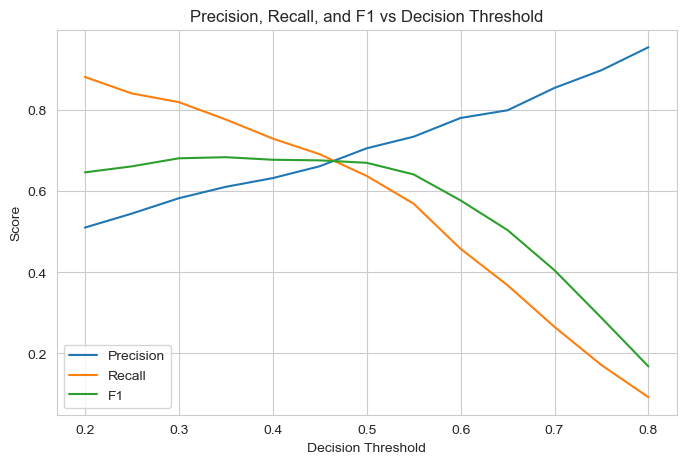

In [82]:
#this code is to plot the prescision, recall, and F1 vs Threshold
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(threshold_df['Threshold'], threshold_df['Precision'], label='Precision')
plt.plot(threshold_df['Threshold'], threshold_df['Recall'], label='Recall')
plt.plot(threshold_df['Threshold'], threshold_df['F1'], label='F1')

plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1 vs Decision Threshold")
plt.legend()
plt.show()

Model performance was evaluated across a range of decision thresholds to understand the tradeoff between precision and recall. Lower thresholds increase recall by identifying a larger proportion of churned customers, but at the cost of more false positives. Higher thresholds improve precision but significantly reduce recall, increasing the risk of missed churners. The F1 score peaks in the 0.30–0.40 threshold range, indicating an optimal balance between sensitivity and specificity for this use case.

This analysis allows threshold selection to be aligned with business priorities. For example, a lower threshold may be appropriate for proactive retention campaigns where missing churners is costly, while a higher threshold may be used when outreach resources are limited. Rather than relying on a fixed default threshold, the model enables flexible, data driven churn intervention strategies.

Threshold tuning enables the churn model to balance customer outreach cost against churn capture rate, transforming raw predictions into actionable retention strategy.

## <a id='toc1_'></a>Decision Threshold Analysis[&#8593;](#toc0_)

#now we chose the threshold based on the the data from the threshold analysis which shows .35 with the highest peak F1 score of .684
chosen_threshold = 0.35

#The selected threshold does not change the underlying model, but instead defines how predicted probabilities are translated into churn flags depending on business sensitivity.

In [102]:
#This code is to create churn risk scores for all customers on the full dataset.
df_clean['churn_probability'] = best_model.predict_proba(X)[:, 1]

In [103]:
#This code is to definre churn risk tiers for business friendliness and interpretable.
def risk_segment(p):
    if p < 0.20:
        return 'Low Risk'
    elif p < chosen_threshold:
        return 'Medium Risk'
    elif p < 0.60:
        return 'High Risk'
    else:
        return 'Very High Risk'

df_clean['churn_risk_segment'] = df_clean['churn_probability'].apply(risk_segment)

In [104]:
#This code is to outline each segment into a nice table
segment_summary = (
    df_clean
    .groupby('churn_risk_segment')
    .agg(
        customers=('Churn', 'count'),
        churn_rate=('Churn', 'mean'),
        avg_tenure=('Tenure in Months', 'mean'),
        avg_monthly_charge=('Monthly Charge', 'mean')
    )
    .sort_values('churn_rate')
)

segment_summary

,customers,churn_rate,avg_tenure,avg_monthly_charge
churn_risk_segment,,,,
Low Risk,3824,0.061715,44.509676,58.044796
Medium Risk,853,0.218054,23.982415,63.562016
High Risk,1176,0.434524,19.498299,70.947491
Very High Risk,1190,0.786555,12.191597,81.092983


Higher churn risk corresponds to shorter tenure and higher monthly charges.

After selecting a decision threshold (0.35) based on F1 performance on the test set, the final tuned pipeline was used to generate churn probabilities for each customer. These probabilities represent a continuous churn risk score between 0 and 1 and enable a more flexible, business-oriented view of churn risk beyond binary classification.

To support actionable decision-making, customers were segmented into four churn risk tiers (Low, Medium, High, Very High) based on their predicted churn probability. Segment-level summary statistics were then calculated to profile each group, including the number of customers, observed churn rate, average tenure, and average monthly charges. This segmentation allows marketing and customer success teams to prioritize retention efforts by focusing resources on the highest-risk segments while maintaining lighter-touch engagement for lower-risk customers.

Key Segment Insights;

- Churn rate increases sharply across segments from low rist of 6% to high risk of 79%, indicating the model produces meaningful risk stratification.
- Higher risk segments are characterized by shorter tenure and higher monthly charges, suggesting both early lifecycle experience and price sensitivity are major drivers of churn risk.
- This risk based segmentation enables targeted retention strategies (proactive outreach for Very High Risk customers and cost efficient nurturing for Medium Risk customers).

The segmentation step uses the model’s probability outputs (not the target labels) to create actionable groups, while the threshold selection was performed on held out data to ensure the decision rule is not overfit to the training set.

## <a id='toc1_'></a>Churn Risk Segmentation and Business Insights[&#8593;](#toc0_)

The churn risk segmentation reveals a strong and consistent relationship between predicted risk, observed churn behavior, customer tenure, and monthly charges. Customers in higher risk segments exhibit significantly higher churn rates, shorter tenure, and higher monthly costs. This monotonic pattern across segments confirms that the model effectively stratifies customers by churn risk and provides a reliable foundation for targeted retention strategies.

Business Recommendation by segment;

LOW RISK
- 6% churn, long tenure, lower cost
-  Maintain standard engagement and loyalty messaging
- Avoid unnecessary discounts to protect margin
- Focus on long term satisfaction and experience

Goal: Retain profitably, minimal intervention

MEDIUM RISK
- 22% churn, mid tenure
- Maintain standard engagement and loyalty messaging
- Avoid unnecessary discounts to protect margin
- Focus on long term satisfaction and experience

Goal: Retain profitably, minimal intervention

HIGH RISK
- 43% churn, short tenure, higher cost
- Targeted retention offers (bundles, pricing adjustments)
- Outreach addressing specific service pain points
- Prioritize by lifetime value

Goal: Reduce near-term churn with focused incentives

VERY HIGH RISK
- 79% churn, very short tenure, highest cost
- Immediate intervention or win-back campaigns
- Consider cost-benefit thresholds for retention
- Escalate to human outreach where appropriate

Goal: Intervene decisively or manage churn impact efficiently

Churn risk is strongly associated with early tenure and higher monthly charges, enabling the company to prioritize retention efforts where both churn likelihood and revenue impact are highest.

## <a id='toc1_'></a>Conclusion[&#8593;](#toc0_)

This project developed a machine learning based churn risk model to support customer retention strategy at a telecommunications company. Using a reproducible modeling pipeline with hyperparameter tuning, the final model demonstrated stable generalization performance and strong discriminatory power, as evidenced by consistent F1 scores across cross validation and the test set, as well as a high ROC AUC.

Rather than relying solely on binary predictions, the model’s probability outputs were leveraged to segment customers into four churn risk tiers. These segments revealed clear and actionable patterns: churn risk increases sharply for customers with shorter tenure and higher monthly charges. This risk-based framework enables targeted, cost effective retention strategies by aligning intervention intensity with both churn likelihood and potential revenue impact. Overall, the model serves as a practical decision support tool that balances predictive performance with interpretability to inform data driven business decisions.

## <a id='toc1_'></a>Limitations[&#8593;](#toc0_)

- The model does not account for marketing intervention effects
- Behavioral usage data could further improve early churn detection
- Threshold selection does not yet incorporate explicit cost modeling

## <a id='toc1_'></a>Next Steps & Recommendations[&#8593;](#toc0_)

While the current model provides meaningful insights into churn risk, several extensions could further enhance its business value:
- Cost-sensitive threshold optimization: Incorporate estimated retention costs and customer lifetime value to select thresholds that maximize net business impact rather than purely statistical metrics.
- Campaign effectiveness analysis: Measure the lift from targeted retention campaigns applied to high-risk segments to validate real-world impact.
- Feature enrichment: Integrate additional behavioral or usage data to improve early detection of churn risk, particularly in the first 12–24 months of customer tenure.
- Ongoing monitoring: Periodically retrain and recalibrate the model to account for changes in pricing, products, or customer behavior over time.

These steps would allow the organization to evolve from predictive insight to continuous, data-driven retention optimization.